# PHYS 210, Homework 10 - Solutions
Due Wednesday, Oct 16, 2024 at the start of class on Canvas

## *Overview*

This homework assignment focuses on developing some skills relevant to your upcoming Project 02. Specifically, you will be getting more practice working with `solve_ivp`, and some practice using functions to help you conduct phase-space investigations

## *The situation you are modelling using `solve_ivp`: a comet's close approach to the Earth*

We want to determine how close the comet Peanut Butter---travelling in our solar system---will come to Earth. Our measurements and current models give us a fairly precise picture of the comet's position and trajectory when it is approximately 3.5 AU from the Sun. As a citizen scientist, you decide to produce some visualizations related to the situation. You also decide to perform a phase-space investigation to explore how the accuracy in our knowledge of the comet's position might impact how close the calculated approach will be.

You will be using `solve_ivp` to model the path of the comet as it interacts gravitationally with the sun and the Earth. The first image below is a visualization of this motion that you will be reproducing based on data from your `solve_ivp` output (Task 1). The second image shows an example phase space investigation of how the comet's closest distance to the Earth varies as a function of small changes to the comet's initial y-velocity (Task 2).

![comet path](https://i.ibb.co/YRSvR0J/comet-path.png)
<center><b>Figure 1.</b> A visualization of the sun, Earth, comet system, with the comet's motion being modelled using solve_ivp. </center>

![phase space investigation](https://i.ibb.co/F8BHpk0/varyvx.png)
<center><b>Figure 2.</b> A phase space investigation of the impact of the comet's initial y-velocity on the "distance of closest approach" between the comet and Earth.</center>


## *Further details of the simulation*

**Constants:** We are working in units of AU (astronomical distance units), solar masses and years, where we have the following constants:
* $G = 39.48 \text{ AU}^3 (M_\text{sun})^{-1} year^{-2}$
* $M_\text{earth} = 3.003 \times 10^{-6} M_\text{sun}$
* $M_\text{sun} = 1.0 M_\text{sun}$
* $a_\text{earth} = 1.0 \text{ AU}$ (average distance from the Earth to the sun)

**Earth's motion:** To simplify the model, treat Earth as having a perfectly circular path with position
* $x = 1.0 \times \sin(2 \pi t) \mbox{ AU}$ , and
* $y = -1.0 \times \cos(2 \pi t) \mbox{ AU}$,

with $t$ being measured in years. **Important!** This means that `solve_ivp` is only used to model the motion of the comet. At any time $t$ these equations give you the position of the Earth.

**The sun's position:** The sun remains at the origin in this coordinate system. 

**The comet's initial conditions:** The initial state vector for our comet is
* $x_0 = 3.5\mbox{ AU}$,
* $y_0 = 0.5\mbox{ AU}$,
* $v_{x0} = -6.0 \mbox{ AU/year}$, and
* $v_{y0} = -2.0 \mbox{ AU/year}$.

**`solve_ivp` details:** You will be modelling the path of the comet using `solve_ivp`:
* Model the path of the comet from its initial position (see above) through its approach toward the sun and then up until it is travelling away from the sun and is 1 AU from the sun. This point at which the comet has crossed the Earth's orbit (at 1 AU away from the sun) is when you should terminate the simulation (as shown in Figure 1).
  * We define the "distance of closest approach" to be the distance between the Earth and the outard-moving comet at this point when the comet crosses the Earth's orbit at 1 AU from the sun. This is a significant simplification of how one would normally calculate the actual closest distance distance between them.
* Use a minimum of 5000 time steps per year when modelling the motion of the comet using `solve_ivp`
* To maximize the accuracy of the motion in the simulation, use the following `rtol` (relative toleranace) and `atol` (absolute tolerance) arguments:
```python
sol = solve_ivp(diff_eqns, .. , rtol=1e-9, atol=1e-9)
```

## *Task 1: Build a function to run the simulation with an optional flag to show the visualization*

Build a function `comet_approach` that accepts two arguments: the initial state vector for your comet `[x, y, vx, vy]` and an optional Boolean flag. The two example function calls below specify the behaviours the function should have based the state of the optional Boolean flag:


**When the optional Boolean flag is `True`.** Example:
```python
comet_approach( [3.5, 0.5, -6.0, -2.0], True )  # display plot but return no value
```
This call to `comet_approach` should display your visualization, but have no return value (meaning it should be a void function when the optional Boolean flag is `True`). This is how you will be displaying a visualization like that shown in Figure 1. Try to reproduce the visualization in Figure 1 as closely as possible, but do not get caught up trying to reproduce the 0.0046 AU closest distance exactly. Within a factor of 10 is close enough. 
<br><br><br>
**When the optional Boolean flag is absent or `False`.** Example:
```python
d_approach = comet_approach( [3.5, 0.5, -6.0, -2.0] )  # return the distance, but display no plot
```
This call to `comet_approach` should <u>not</u> display your visualization. Instead the function should return the distance of closest apprach between the comet and the Earth, defined earlier as the distance between the Earth and comet at the point when the comet is travelling away from the sun and crosses the Earth's path at 1 AU from the sun.

In the code box(es) below you should include all of the code infrastructure needed such that after they are run, a call to `comet_approach()` using either of the examples above would have the desired behaviour.


In [1]:
# Solution

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define gravitational constant and masses in AU, solar masses, and years
G = 39.48  # AU^3 M_sun^-1 year^-2
M_earth = 3.003e-6  # M_sun
M_sun = 1.0  # M_sun

def diff_eqns(t, state):
    # Extract state variables from y for the spacecraft
    x, y, vx, vy = state
    
    # Update Earth's position based on a circular orbit
    x_earth = np.sin(2*np.pi*t)
    y_earth = -np.cos(2*np.pi*t)
    
    # Gravitational accelerations due to Earth on spacecraft
    r_earth = np.sqrt((x - x_earth)**2 + (y - y_earth)**2)
    ax_earth = -G * M_earth * (x - x_earth) / r_earth**3
    ay_earth = -G * M_earth * (y - y_earth) / r_earth**3
    
    # Gravitational accelerations due to Sun on spacecraft
    ax_sun = -G * M_sun * x / (x**2 + y**2)**1.5
    ay_sun = -G * M_sun * y / (x**2 + y**2)**1.5
        
    return [vx, vy, ax_earth + ax_sun, ay_earth + ay_sun]

def event(t, y):
    # Return the difference between spacecraft's distance from the Sun and 2 AU
    return np.sqrt(y[0]**2 + y[1]**2) - 1

# Make the event terminal
event.terminal = True
event.direction = 1

def comet_approach(state0, show_plots = False):
    # Initial conditions in AU and AU/year for the spacecraft

    # Time array in years
    t0, tmax = 0, 1  # years
    n_steps = 5000
    t_span = (t0, tmax)  # from t=0 to t=2
    times = np.linspace(t0, tmax, n_steps) 

    sol = solve_ivp(diff_eqns, t_span, state0, t_eval=times, events=event, rtol=1e-9, atol=1e-9)
    earth_x = np.sin(2*np.pi*sol.t)
    earth_y = -np.cos(2*np.pi*sol.t)

    closest = np.sqrt((earth_x[-1]-sol.y[0][-1])**2+(earth_y[-1]-sol.y[1][-1])**2)
    
    if show_plots:
       
        # Plot
        plt.figure(figsize=(8,8))
        plt.plot(0, 0, 'ro', label='Sun')
        plt.plot(earth_x, earth_y, 'g--', label='Earth')
        plt.plot(0, -1, 'go')
        plt.plot(state0[0], state0[1], 'bo')
        plt.plot(sol.y[0], sol.y[1], 'b-', label='Comet')
        plt.xlabel('x (AU)')
        plt.ylabel('y (AU)')
        plt.legend()
        plt.grid(True)
        plt.axis('equal')
        plt.title(f"Closest approach to Earth is {closest:.4f} AU")
        plt.savefig("comet_path.png")
        plt.show()   
    
    else:
        return closest


#### Test 1: visualization

Use only the function call below to produce your visualization. Your visualization should reproduce the same general features as Figure 1.

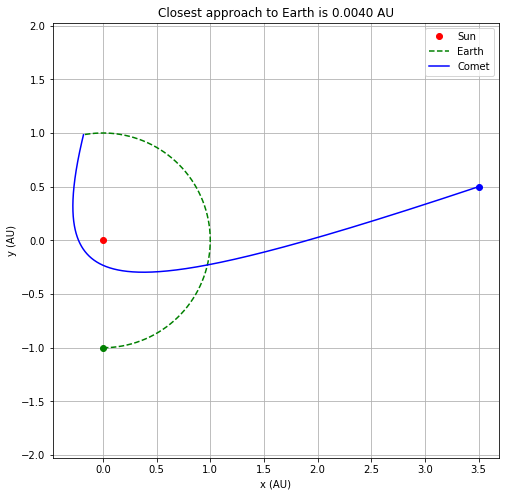

In [2]:
# Test 1: Run this cell without adding/modifying code to demonstrate your function's behaviour

comet_approach( [3.5, 0.5, -6.0, -2.0], True ) # display plot but return no value

####  Test 2: return value with no visualization

Use only the two lines below to return the closest approach information from your function and print it to the screen. There should be no visualization plotted.

In [3]:
# Run this cell without adding/modifying code to demonstrate your function's behaviour

d_approach = comet_approach( [3.5, 0.5, -6.0, -2.0] )  # return approach distance and DISPLAY NO PLOT.
print("The distance of closest approach for the initial conditions is",d_approach,"AU.")

The distance of closest approach for the initial conditions is 0.003968477227215618 AU.


### Task 1 self-assessment checklist
**Overall:** 
1. The gravitational forces from both the Sun and the Earth are used when calculating the acceleration of the comet
1. Choices are made when calling `solve_ivp` to keep accuracy high, such as using the arguments `rtol=1e-9` and `atol=1e-9` within `solve_ivp` and using at least 5000 time steps per year. However, you do not need to reproduce the exact closest approach distance values shown in any of our examples.

**Visualizations (optional boolean flag set to True):** 
1. When called with the optional Boolean flag set to True (e.g., `comet_approach( [3.5, 0.5, -6.0, -2.0], True )`), a visualization is produced without the call to the function needing to be further modified.
1. `comet_approach()` is a void function (returns no value) when called with the optional Boolean flag set to `True`
1. The three ojects and their trajectories are plotted such that they can be distinguished from each other and clearly identified via the legend
1. There are appropriate axis titles
1. The plotted trajectories end when the comet crosses the Earth's orbit (1AU) while travelling away from the sun.
1. (Optional) The closest approach distance is automatically updated and communicated through the plot title

**Return values (optional boolean flag set to False):** 
1. When called without the optional Boolean flag, (e.g., `comet_approach( [3.5, 0.5, -6.0, -2.0] )`) no plots are created
1. When called without the optional Boolean flag, (e.g., `comet_approach( [3.5, 0.5, -6.0, -2.0] )`) the closest approach distance is returned

## *Task 2: Investigate how the distance of closest approach depends on the initial y-velocity of the comet*

You are going to perform a phase space investigation related to the initial x-position of the comet, meaning that you will use a comet state vector `[x, 0.5, -6.0, -2.0]`, where you systematically use different values for `x` to determine the distance of closest approach as determined by your `comet_approach()` function and then you will plot the results. 

Create a graph in the style of Figure 2 at the start of the document, but note that Figure 2 was done for a phase-space investigation using initial y-velocity, so there will be important differences for your phase-space investigation using x-position. 

In your phase-space investigation:
* You should vary the initial x-position of the comet over some small range close to the initial state vector, while leaving the other variables in that initial state vector alone. 
* Pick a distance that you consider to be a dangerously close approach. In our example we used a distance of 0.01 AU (approximately four times the average distance between the Earth and moon), but you may need to choose a higher value since your choices related to `solve_ivp` implementation may not have allowed your comet to get as close as in the examples provided. 
* Fine-tune the range for your x-positions in your phase-space investigation so that approximately 1/4 to 1/2 of the values that you will plot will be closer than your "dangerously close" approach distance.
* Produce a plot in a similar style as the one we produced in Figure 2, where the x-positions that correspond to dangerously close approaches are indicated differently than those that don't
* Determine the minimum distance of closest approach and determine the initial x-position that corresponds to this smallest distance. Include these values on your graph. These values should be determined automatically by your code.

### Task 2 self-assessment checklist:
1. A graph of distance of closest approach vs x-position has been produced.
1. A visual cue has been provided to distinguish between the dangerously close distances of closest approach and those that weren't
1. The dangerously close distances represent approximately 1/4-1/2 of the plotted data points
1. The minimum distance of closest approach and its corresponding initial x-position have been indicated on the graph
1. For the previous point, these values were calculated automatically by your code.

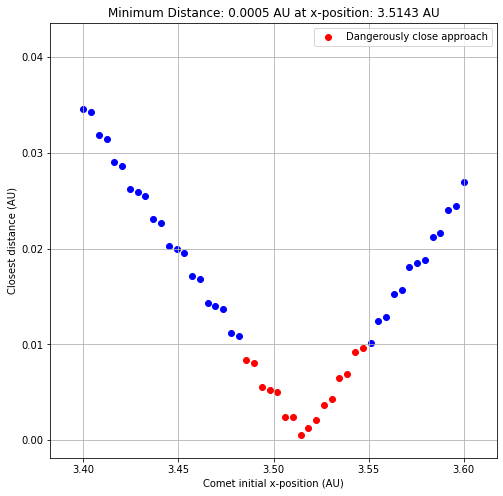

In [4]:
# Solution

# Generate the data
x_arr = np.linspace(3.4,3.6,50)
closest_arr = np.zeros(x_arr.shape)
for i, x in enumerate(x_arr):
    closest_arr[i] = comet_approach([x, 0.5, -6, -2])

min_distance = np.min(closest_arr)
associated_x = x_arr[np.argmin(closest_arr)]

# Make plots
plt.figure(figsize=(8, 8))
mask = closest_arr <= 0.01 # create a mask for the two types of plotted data points
plt.scatter(x_arr[~mask], closest_arr[~mask], c='blue')
plt.scatter(x_arr[mask], closest_arr[mask], c='red', label='Dangerously close approach')
plt.legend()
plt.grid(True)
plt.xlabel('Comet initial x-position (AU)')
plt.ylabel('Closest distance (AU)')
plt.title(f'Minimum Distance: {min_distance:.4f} AU at x-position: {associated_x:.4f} AU')

plt.show()
